In [1]:
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import pickle
%matplotlib inline

In [2]:

documents=[]
with open('data/resume/dataset_Skills.json','r') as skills:
    data=json.load(skills)
    for i in range(0,1450):
        documents.append((data['0'][str(i)],'Skills'))
        
        
with open('data/resume/dataset_Education.json','r') as educ:
    data=json.load(educ)
    for i in range(0,1697):
        documents.append((data['0'][str(i)],'Education'))
        
with open('data/resume/dataset_Experience.json','r') as exp:
    data=json.load(exp)
    for i in range(0,1749):
        documents.append((data['0'][str(i)],'Experience'))

df=pd.DataFrame(documents,columns=['text','class'])   

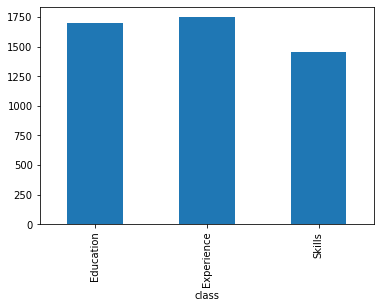

In [3]:
df.groupby('class').text.count().plot.bar(ylim=0)
plt.show()

In [4]:
words = stopwords.words("english")
df['cleaned'] = df['text'].apply(lambda x: " ".join([i for i in x.split() if i not in words]))
df.head()

,text,class,cleaned
0,"60 wpm (10+ years), Data Base (10+ years), Pay...",Skills,"60 wpm (10+ years), Data Base (10+ years), Pay..."
1,"SQL (10+ years), ETL (10+ years), EXTRACT, TRA...",Skills,"SQL (10+ years), ETL (10+ years), EXTRACT, TRA..."
2,"Crystal Reports (2 years), Databases (8 years)...",Skills,"Crystal Reports (2 years), Databases (8 years)..."
3,"Oracle database, SQL , End user training (4 ye...",Skills,"Oracle database, SQL , End user training (4 ye..."
4,"QUOTA (Less than 1 year), CUSTOMER SERVICE (Le...",Skills,"QUOTA (Less 1 year), CUSTOMER SERVICE (Less 1 ..."


In [5]:
vectorizer = TfidfVectorizer(min_df= 3, stop_words="english", sublinear_tf=True, norm='l2', ngram_range=(1, 3))
final_features = vectorizer.fit_transform(df['cleaned']).toarray()
final_features.shape
df = df.sample(frac=1).reset_index(drop=True)


In [6]:
#first we split our dataset into testing and training set:
# this block is to split the dataset into training and testing set 
X = df['cleaned']
Y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
# instead of doing these steps one at a time, we can use a pipeline to complete them all at once
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=1200)),
                     ('clf', RandomForestClassifier())])
# fitting our model and save it in a pickle for later use
model = pipeline.fit(X_train, y_train)
with open('RandomForest.pickle', 'wb') as f:
    pickle.dump(model, f)
ytest = np.array(y_test)
# confusion matrix and classification report(precision, recall, F1-score)
print(classification_report(ytest, model.predict(X_test)))
print(confusion_matrix(ytest, model.predict(X_test)))

c:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

   Education       0.95      1.00      0.97       420
  Experience       1.00      0.95      0.97       444
      Skills       1.00      1.00      1.00       360

    accuracy                           0.98      1224
   macro avg       0.98      0.98      0.98      1224
weighted avg       0.98      0.98      0.98      1224

[[419   1   0]
 [ 23 421   0]
 [  0   1 359]]


In [7]:
str="""Work Experience"""
print(model.predict([str]))

['Education']
